<a href="https://colab.research.google.com/github/YinmiAlas/early-stage-diabetes-prediction/blob/master/DS_Unit2_BW_diabetes_risk_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This has been collected using direct questionnaires from the patients of Sylhet Diabetes  Hospital in Sylhet, Bangladesh and approved by a doctor.



# we will predict Early stage diabetes risk prediction 2020 and i will use this topics:

# Chossing target: 
### 'Class': that bring the classes like Positive and Negative  this column is the one i will use to predict because im predicting the risk of diabetes so clearly we can see thats has the labeled classes.


# Choose the evaluation Metrics this metrics are the rigth ones for classifications models:

###  Accuracy score 
###  ROC AUC score
###  Confusion Matrix.
###  Classification Report.

# Choose the model :

### Logistic Regression
### Desicion Trees 
### Random Forest
### XGBoost


Student also explains: Why & how they chose their target, metric, and baseline. How they avoided leakage. When & why the model is (or is not) useful

In [1]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'
    !pip install category_encoders==2.*
    !pip install pandas-profiling==2.*
    !pip install pdpbox
    !pip install shap
    !pip install eli5

# If you're working locally:
else:
    DATA_PATH = '../data/'

In [2]:
# loading library to upload the data from the local files
from google.colab import files
uploaded = files.upload()

Saving diabetes_data_upload.csv to diabetes_data_upload.csv


In [3]:
# loading data
import pandas as pd
import numpy as np

diabetes = pd.read_csv('diabetes_data_upload.csv')
diabetes

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


# Processing

In [4]:
# Change column names: replacing spaces with underscores
diabetes.rename(columns={'sudden weight loss': 'sudden_weight_loss', 'Genital thrush': 'Genital_thrush', 
                         'visual blurring': 'visual_blurring', 'delayed healing': 'delayed_healing', 
                         'partial paresis': 'partial_paresis', 'muscle stiffness': 'muscle_stiffness'}, inplace=True)

# making capitalizing the fisrt letter of each head column 
diabetes.columns = map(lambda x: str(x).capitalize(), diabetes.columns)

diabetes

,Age,Gender,Polyuria,Polydipsia,Sudden_weight_loss,Weakness,Polyphagia,Genital_thrush,Visual_blurring,Itching,Irritability,Delayed_healing,Partial_paresis,Muscle_stiffness,Alopecia,Obesity,Class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


In [5]:
# i need to split the data twice 
from sklearn.model_selection import  train_test_split
train_validate, test = train_test_split(diabetes, train_size=0.80, test_size=0.20, 
                              stratify=diabetes['Class'], random_state=42)

train_validate.shape, test.shape

((416, 17), (104, 17))

In [6]:
# second split
train, validate = train_test_split(train_validate, train_size=0.80, test_size=0.20, 
                              stratify=train_validate['Class'], random_state=42)

train.shape, validate.shape

((332, 17), (84, 17))

In [7]:
# checking every column of the dataset their overview
from pandas_profiling import ProfileReport
profile = ProfileReport(train, minimal=True).to_notebook_iframe()

profile

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Begin with baselines for classification.

In [8]:
# Begin with baselines for classification.
target = 'Class'
y_train = train[target]
y_train.value_counts(normalize=True)

Positive    0.614458
Negative    0.385542
Name: Class, dtype: float64

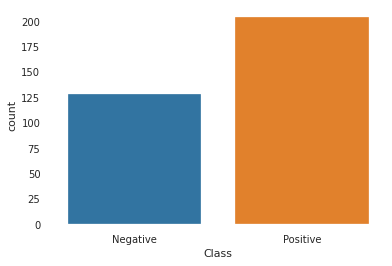

In [9]:
#visualizing the target
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.countplot(y_train);

In [10]:
#checking the majority
majority_class = y_train.mode()[0]
y_pred = [majority_class] * len(y_train)
y_pred

['Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',

In [11]:
from sklearn.metrics import accuracy_score

y_validate = validate[target]
y_pred = [majority_class] * len(y_validate)
accuracy_score(y_validate, y_pred)

0.6190476190476191

# Modeling

## Logistic Regression Model

In [12]:
# Using the target i choosed
target = 'Class'

# Get a dataframe with all train columns except the target
features = train.columns.drop([target])


# vectors and matrices
X_train = train[features]
y_train = train[target]
X_validate = validate[features]
y_validate = validate[target]
X_test = test[features]
y_test = test[target]

In [13]:
# making pipeline and fitting the data
import category_encoders as ce 
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='median'), 
    LogisticRegression(random_state=100, max_iter=50) # more iterations higher accuracy
  )

# Fitting on train
pipeline.fit(X_train, y_train)

#prediction on X_test
y_pred1 = pipeline.predict(X_test)

#predict probabilities for the test set.
y_pred_proba1 = pipeline.predict_proba(X_test)[:, -1]

# accuracy is kinda the times the guest try 
#score on validate
print('Validation Accuracy', pipeline.score(X_validate, y_validate))
print('Test ROC AUC score', roc_auc_score(y_test, y_pred_proba1))

Validation Accuracy 0.9166666666666666
Test ROC AUC score 0.9839843749999999


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


# Confusion Matrix Plot for Logistic Regression Model

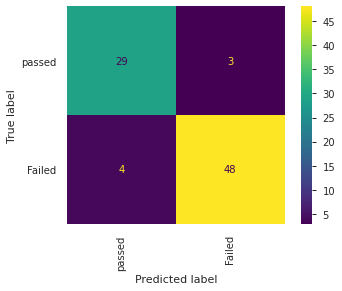

In [14]:
from sklearn.metrics import plot_confusion_matrix

Classes = ['passed', 'Failed']
plot_confusion_matrix(pipeline, X_validate,
                      y_validate, values_format='.0f', 
                      xticks_rotation='vertical', 
                      display_labels=Classes);

# Classification Report for Logistic Regression Model

In [15]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

    Negative       0.91      0.97      0.94        40
    Positive       0.98      0.94      0.96        64

    accuracy                           0.95       104
   macro avg       0.95      0.96      0.95       104
weighted avg       0.95      0.95      0.95       104



## Permutation importances
### Using Logistic Regression 

In [24]:
# permutation importances
import eli5
from eli5.sklearn import PermutationImportance

# encoder and imputer pipeline
imputer = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median')
)

# using the pipeline 
X_train_imputer = imputer.fit_transform(X_train)
X_test_imputer = imputer.fit_transform(X_test)

# using the model ad fitting data
model = LogisticRegression(random_state=100, max_iter=50) # more iterations higher accuracy
model.fit(X_train_imputer, y_train)

# applying or setting up the permution  
permuter = PermutationImportance(
    model, #What is the model?
    scoring = 'accuracy', #What scoring parameter do you want to use?
    n_iter=5, #How many of random shuffles?
    random_state=42  
)

# using the permutation
permuter.fit(X_train_imputer, y_train) 
feature_names = X_validate.columns.tolist()
pd.Series(permuter.feature_importances_, feature_names).sort_values()

# using eli5 to show the permutation work
eli5.show_weights(
    permuter, 
    top=None, # No limit: show permutation importances for all features
    feature_names=feature_names # must be a list
)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS R

Weight,Feature
0.1428 ± 0.0246,Polyuria
0.1211 ± 0.0350,Gender
0.1084 ± 0.0241,Polydipsia
0.0476 ± 0.0089,Irritability
0.0398 ± 0.0192,Itching
0.0187 ± 0.0134,Visual_blurring
0.0163 ± 0.0090,Muscle_stiffness
0.0096 ± 0.0045,Genital_thrush
0.0084 ± 0.0080,Alopecia
0.0054 ± 0.0059,Age


# Decision Tree Model

In [16]:
#creating the pipeline with the libraries below
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline

pipeline1 = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    SimpleImputer(strategy='mean'), 
    DecisionTreeClassifier(criterion='gini',
                             max_depth = 10,
                             max_features = 'auto',
                             random_state = 1,
                             splitter = 'best'))

# Fit on train
pipeline1.fit(X_train, y_train)

# Predict on test
y_pred2 = pipeline1.predict(X_test)

#predict probabilities for the test set.
y_pred_proba2 = pipeline1.predict_proba(X_test)[:, -1]

# accuracy is kinda the times the guest try 
print('Validation Accuracy', pipeline1.score(X_validate, y_validate))
print('Test ROC AUC score', roc_auc_score(y_test, y_pred_proba2))

Validation Accuracy 0.9761904761904762
Test ROC AUC score 0.9718749999999999


# Confusion Matrix Plot for Decision Tree Model

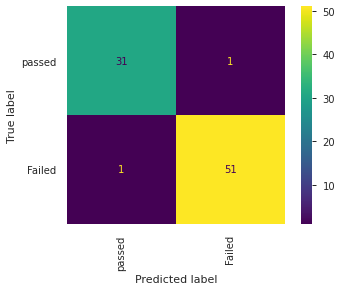

In [17]:
from sklearn.metrics import plot_confusion_matrix

Classes = ['passed', 'Failed']
plot_confusion_matrix(pipeline1, X_validate, y_validate, 
                      values_format='.0f', xticks_rotation='vertical',
                      display_labels=Classes);

# Classification report for Decision Tree Model

In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

    Negative       0.95      0.97      0.96        40
    Positive       0.98      0.97      0.98        64

    accuracy                           0.97       104
   macro avg       0.97      0.97      0.97       104
weighted avg       0.97      0.97      0.97       104



# Visualizing the Desicion Tree Model

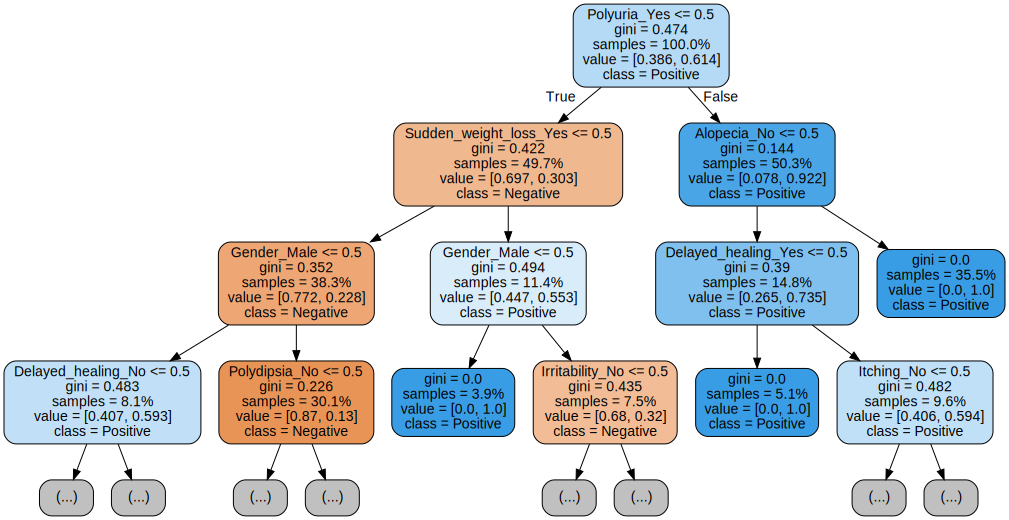

In [19]:
# visualyzing the desicion trees 
import graphviz
from sklearn.tree import export_graphviz

model = pipeline1.named_steps['decisiontreeclassifier']
encoder = pipeline1.named_steps['onehotencoder']
encoded_columns = encoder.transform(X_validate).columns

tree = export_graphviz(model, out_file=None, max_depth=3, feature_names=encoded_columns,
                       class_names=model.classes_,  impurity=True, filled=True, 
                       proportion=True,  rounded=True) 
  
display(graphviz.Source(tree))

# Visualizing The Feature Importances For Desicion Tree Model

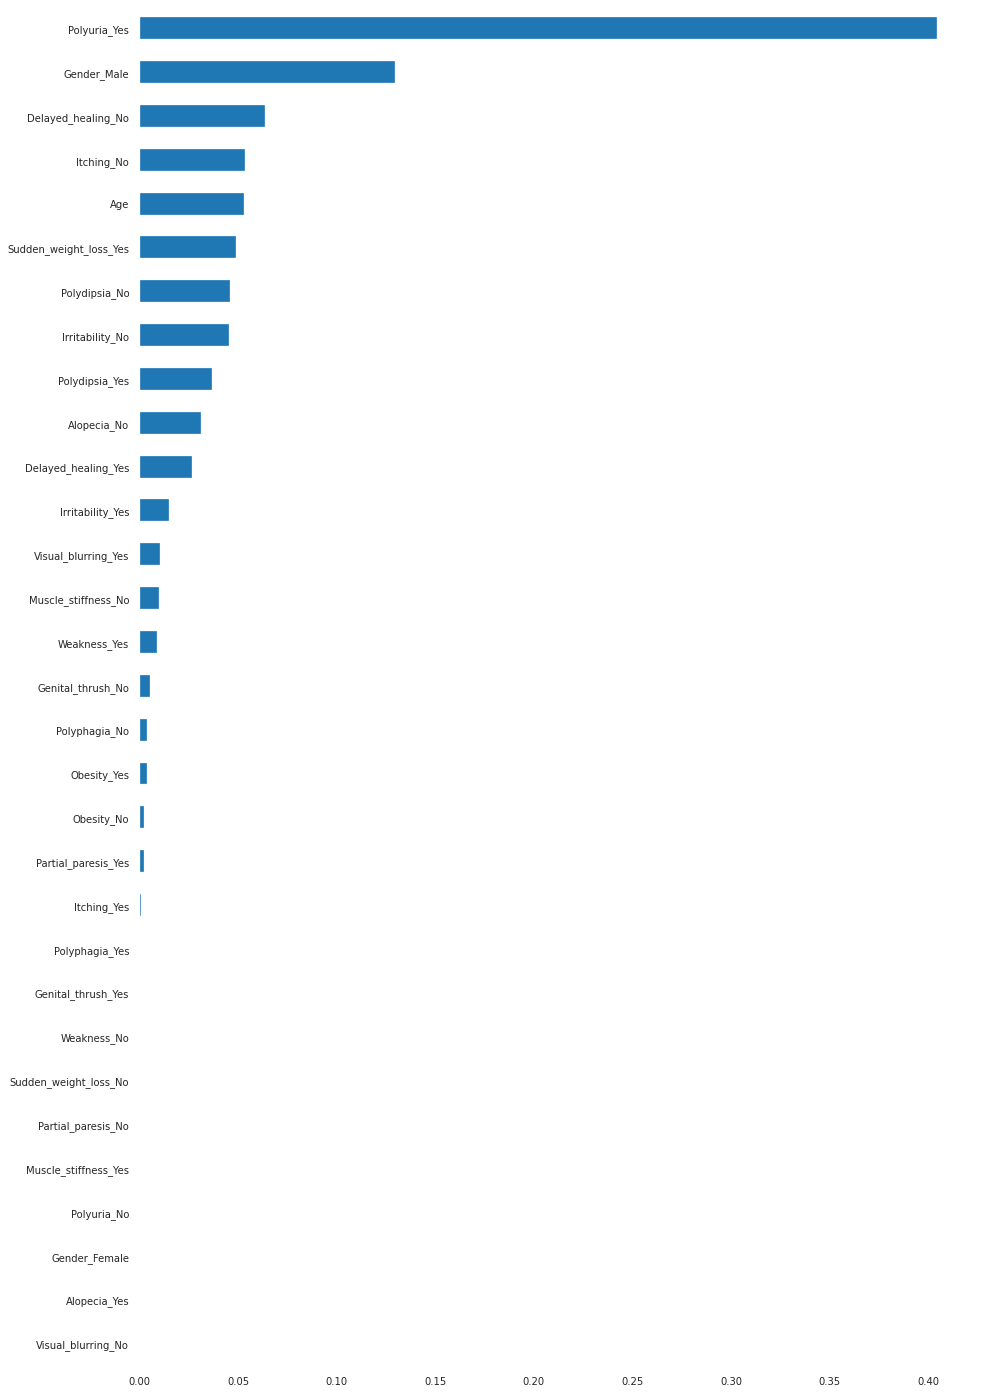

In [20]:
# visualyzing the feature importances
encoder_columns = pipeline1.named_steps['onehotencoder']

encoded_columns = encoder_columns.transform(X_validate).columns

importances = pd.Series(model.feature_importances_, encoded_columns)

plt.figure(figsize=(15,25))

importances.sort_values().plot.barh();

# Random Forest Model

In [21]:
# trying ordinal encoding, imputing data and apply random forest 
from sklearn.pipeline import make_pipeline
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier

pipeline3 = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(random_state=50, n_jobs=-1)
  )

# Fitting on train, score on validate
pipeline3.fit(X_train, y_train)

#prediction on X_test
y_pred3 = pipeline3.predict(X_test)

#predict probabilities for the test set.
y_pred_proba3 = pipeline3.predict_proba(X_test)[:, -1]

# accuracy is kinda the times the guest try 
print('Validation Accuracy', pipeline3.score(X_validate, y_validate))
print('Test ROC AUC score', roc_auc_score(y_test, y_pred_proba3))

Validation Accuracy 0.9642857142857143
Test ROC AUC score 0.999609375


# Confusion Matrix Plot for  Model

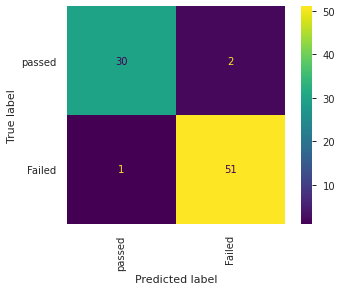

In [22]:
from sklearn.metrics import plot_confusion_matrix

Classes = ['passed', 'Failed']
plot_confusion_matrix(pipeline3, X_validate, y_validate, 
                      values_format='.0f', xticks_rotation='vertical',
                      display_labels=Classes);

In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

    Negative       0.95      1.00      0.98        40
    Positive       1.00      0.97      0.98        64

    accuracy                           0.98       104
   macro avg       0.98      0.98      0.98       104
weighted avg       0.98      0.98      0.98       104



# Partial Dependence Plot, 1 feature isolation

## Using Random Forest Classifier

In [ ]:
# in this case i need to avoid the pipeline the reason why is because
# it will give me error below when i try to set up the pdp_isolate
# i need to enconder first
encoder = ce.OrdinalEncoder()
X_validate_encoder = encoder.fit_transform(X_validate)

# i need to imputer separate because the missing values 
impute = SimpleImputer()
X_validate_inpute2 = impute.fit_transform(X_validate_encoder)

# using model and fitting the data
model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_validate_inpute2, y_validate)

# pulling the features in a variable
features1 = X_validate.columns
features1

# making a dataframe because when you impute lost your features name 
# so i did apply the columns names like a difined above so i can avoid the error below 
# the one saying features name not found
X_validate_inpute2 = pd.DataFrame(X_validate_inpute2, columns=features1)
X_validate_inpute2

In [26]:
X_validate_inpute2['Gender'].value_counts(normalize=True)

2.0    0.666667
1.0    0.333333
Name: Gender, dtype: float64

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


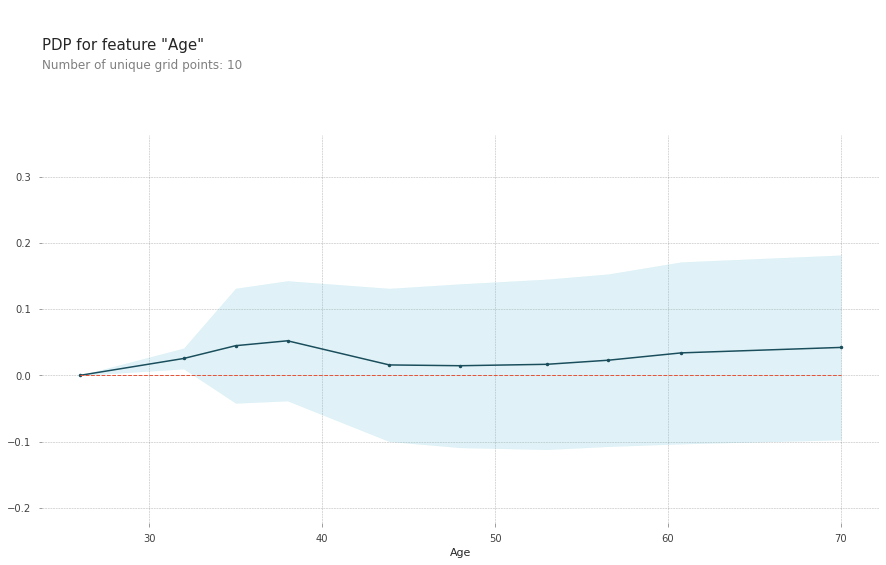

In [27]:
# using pdp_plot to vizualy the feature i want to show
# but first i need to setting up the isolated
from pdpbox.pdp import pdp_isolate, pdp_plot
 
feature = 'Age' #define feature for plot 


isolated = pdp_isolate(
    model=model, #specify model
    dataset=X_validate_inpute2, #specify dataset
    model_features=features1, #specify all the features
    feature=feature #input any feature
    
)

# plotting 
pdp_plot(isolated, feature_name=feature);

# Partial Dependence Plot, 2 features interaction
## Using Random Forest Classifier

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


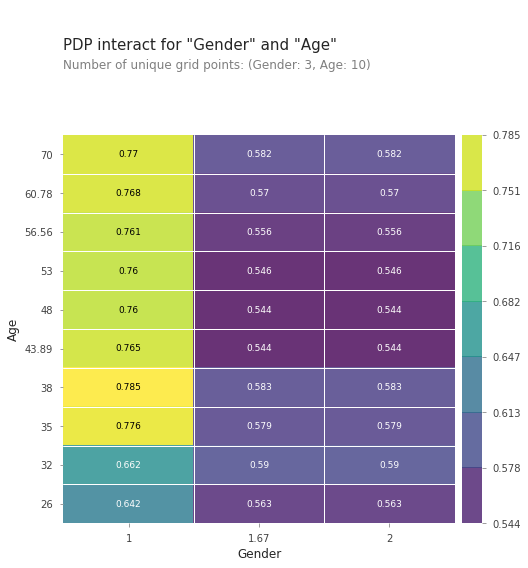

In [28]:
# using the same dataframe like above but making PDP with 2 features
# using the interact library and setting up too
from pdpbox.pdp import pdp_interact, pdp_interact_plot

features2 = ['Gender', 'Age'] #define feature for plot 


interaction = pdp_interact(
    model=model, #specify model
    dataset=X_validate_inpute2, #specify dataset
    model_features=features1, #specify all the features
    features=features2
)

# i see the 2019 riskier than years before
pdp_interact_plot(interaction, plot_type='grid', feature_names=features2);

# XGBoost Classifier Model

# Shapley plot  explaning multiples prediction using their index number or the row number

# using XgBoost

In [29]:
# in this case i decide to use other model desicion tree
# making a pipeline, taking the eval_set , using the model and fitting the data
# choosing the avluation metric AUC
# in this case i decide to use other model XGBoost
# making a pipeline, taking the eval_set , using the model and fitting the data
# choosing the avluation metric AUC

from xgboost import XGBClassifier

processor = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median')
)

X_train_processed = processor.fit_transform(X_train)
X_validate_processed = processor.transform(X_validate)

eval_set = [(X_train_processed, y_train), 
            (X_validate_processed, y_validate)]

model = XGBClassifier(n_estimators=1000, n_jobs=-1)
model.fit(X_train_processed, y_train, eval_set=eval_set, eval_metric='auc', 
          early_stopping_rounds=10)

[0]	validation_0-auc:0.95661	validation_1-auc:0.932993
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.967084	validation_1-auc:0.935998
[2]	validation_0-auc:0.978114	validation_1-auc:0.934796
[3]	validation_0-auc:0.975241	validation_1-auc:0.939002
[4]	validation_0-auc:0.977328	validation_1-auc:0.939603
[5]	validation_0-auc:0.98022	validation_1-auc:0.940204
[6]	validation_0-auc:0.980622	validation_1-auc:0.940204
[7]	validation_0-auc:0.982192	validation_1-auc:0.94381
[8]	validation_0-auc:0.98066	validation_1-auc:0.943209
[9]	validation_0-auc:0.982384	validation_1-auc:0.94381
[10]	validation_0-auc:0.980813	validation_1-auc:0.943209
[11]	validation_0-auc:0.982479	validation_1-auc:0.940204
[12]	validation_0-auc:0.983322	validation_1-auc:0.940805
[13]	validation_0-auc:0.984586	validation_1-auc:0.941406
[14]	validation_0-auc:0.987266	validation_1-auc:0.941106
[15

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [30]:
# define a prediction function for a better visualyzation
import shap

def explain(row_number):
    positive_class = 'positive'
    positive_class_index = 1

    # Get & process the data for the row
    row = X_test.iloc[[row_number]]
    explainer = shap.TreeExplainer(model)
    row_processed = processor.transform(row)

    # Make predictions (includes predicted probability)
    pred = model.predict(row_processed)[0]
    pred_proba = model.predict_proba(row_processed)[0, positive_class_index]
    pred_proba *= 100
    if pred != positive_class:
        pred_proba = 100 - pred_proba

    # Number of Patients
    print('Records of 103 Patiens:')
    print('\n')
    # Show prediction & probability
    print(f'The model predicts this Early stage diabetes risk prediction is {pred}, with {pred_proba:.0f}% probability.')
    
    # Get shapley additive explanations
    shap_values = explainer.shap_values(row_processed)

    # Get top 3 "pros & cons" for fully paid
    feature_names = row.columns
    feature_values = row.values[0]
    shaps = pd.Series(shap_values[0], zip(feature_names, feature_values))
    pros = shaps.sort_values(ascending=True)[:].index
    cons = shaps.sort_values(ascending=True)[:].index

    # Show top 3 reason for prediction
    print('\n')
    print('Top reasons for diabetes risk:')
    print('\n')
    evidence = pros if pred == positive_class else cons
    for i, info in enumerate(evidence, start=1):
        feature_name, feature_value = info
        print(f'{i}. {feature_name} is {feature_value}.')

    # Show Shapley Values Force Plot
    shap.initjs()
    return shap.force_plot(
        base_value=explainer.expected_value, 
        shap_values=shap_values, 
        features=row, 
        link='logit' # For classification, this shows predicted probabilities
    )
# find the prediction typing any number between 0-103
explain(0)

Records of 103 Patiens:


The model predicts this Early stage diabetes risk prediction is Negative, with 57% probability.


Top reasons for diabetes risk:


1. Alopecia is Yes.
2. Polydipsia is No.
3. Polyuria is No.
4. Irritability is No.
5. Polyphagia is No.
6. Sudden_weight_loss is No.
7. Weakness is Yes.
8. Genital_thrush is No.
9. Visual_blurring is Yes.
10. Itching is Yes.
11. Delayed_healing is Yes.
12. Partial_paresis is No.
13. Obesity is No.
14. Muscle_stiffness is No.
15. Age is 50.
16. Gender is Female.
